In [286]:
from copy import deepcopy

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

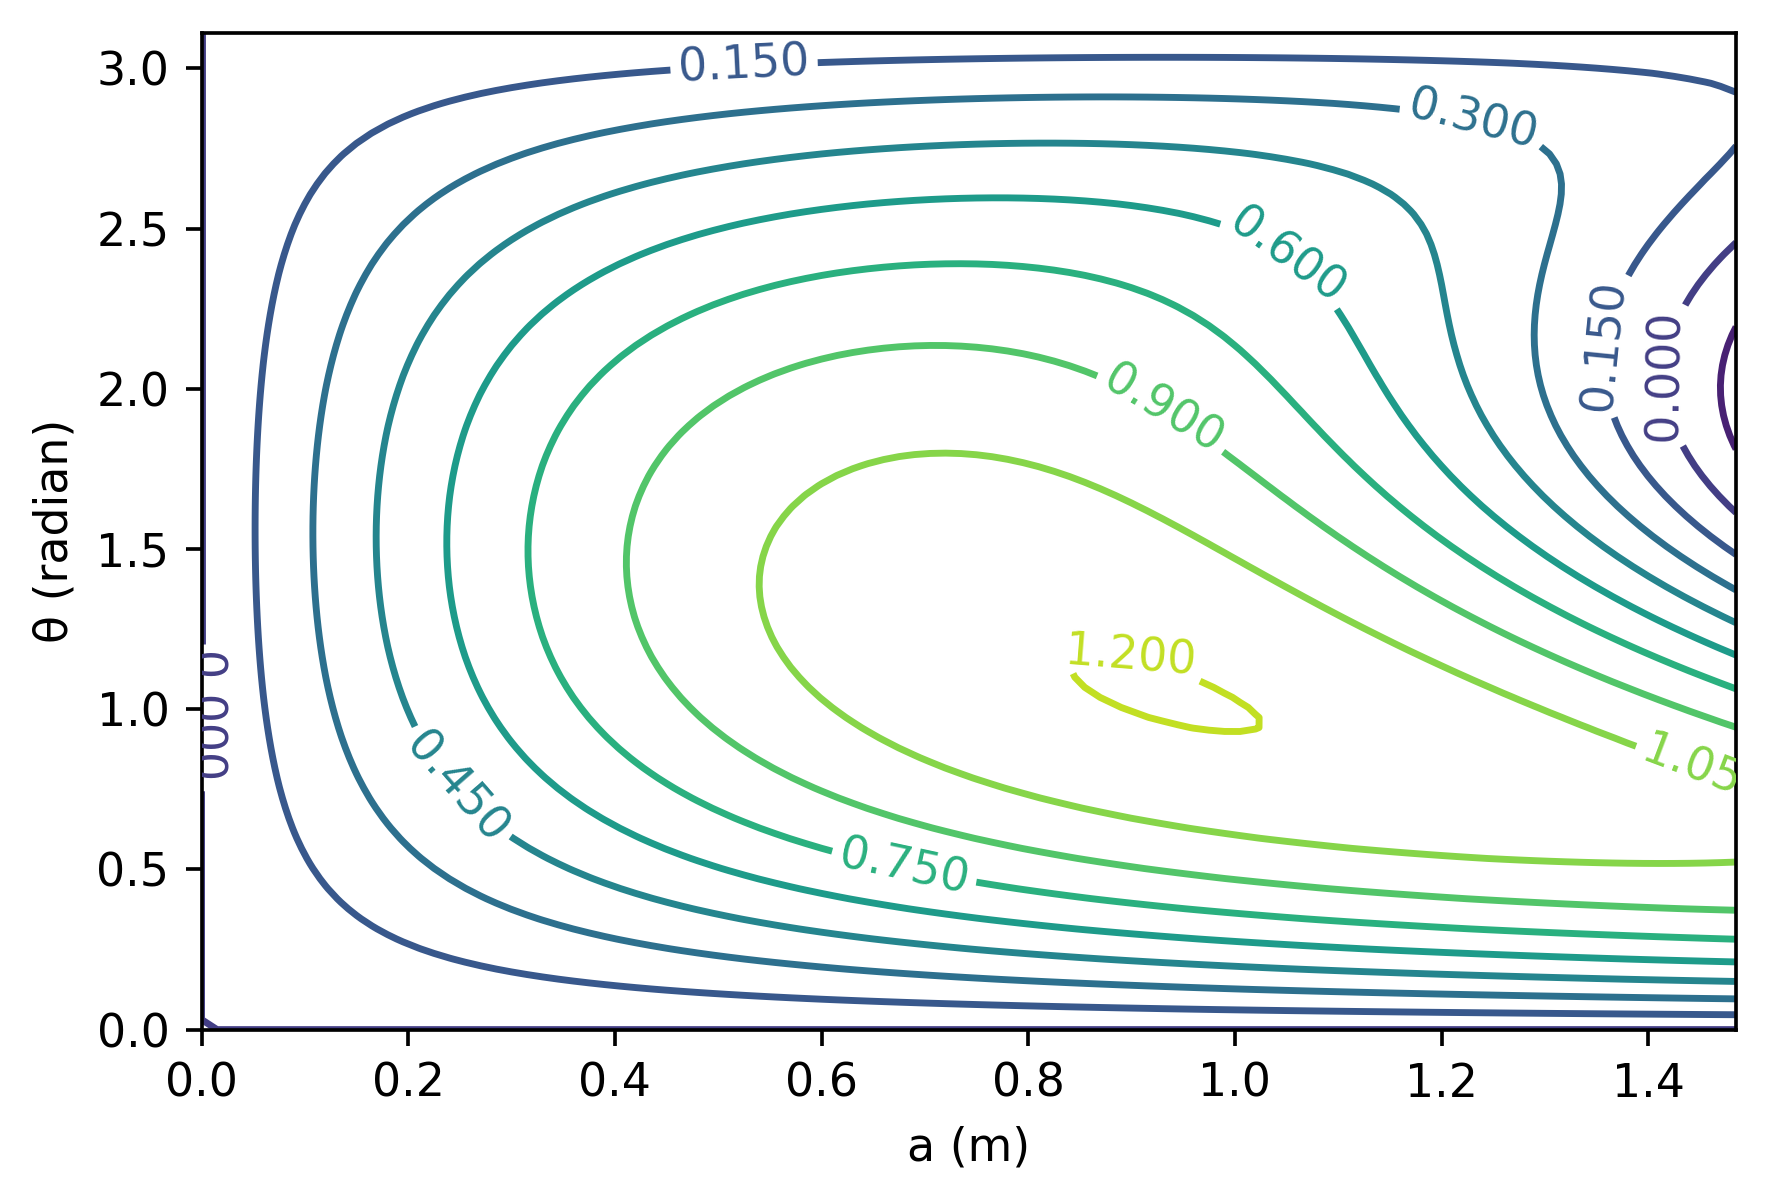

In [146]:
# Fig 1A
a = np.arange(0, 1.5, 1.5 / 100)
theta = np.arange(0, np.pi, np.pi / 100)
a_grid, theta_grid = np.meshgrid(a, theta)
area = -a_grid**2 * np.sin(theta_grid)**2 - a_grid**2 * np.sin(theta_grid) + 3*a*np.sin(theta_grid) + a**2*np.cos(theta_grid)*np.sin(theta_grid)/2

fig, ax = plt.subplots(dpi=330)
cs = ax.contour(a_grid, theta_grid, area, 10)
ax.clabel(cs, inline=True, fontsize=10)
plt.xlabel("a (m)")
plt.ylabel("θ (radian)")
plt.show()

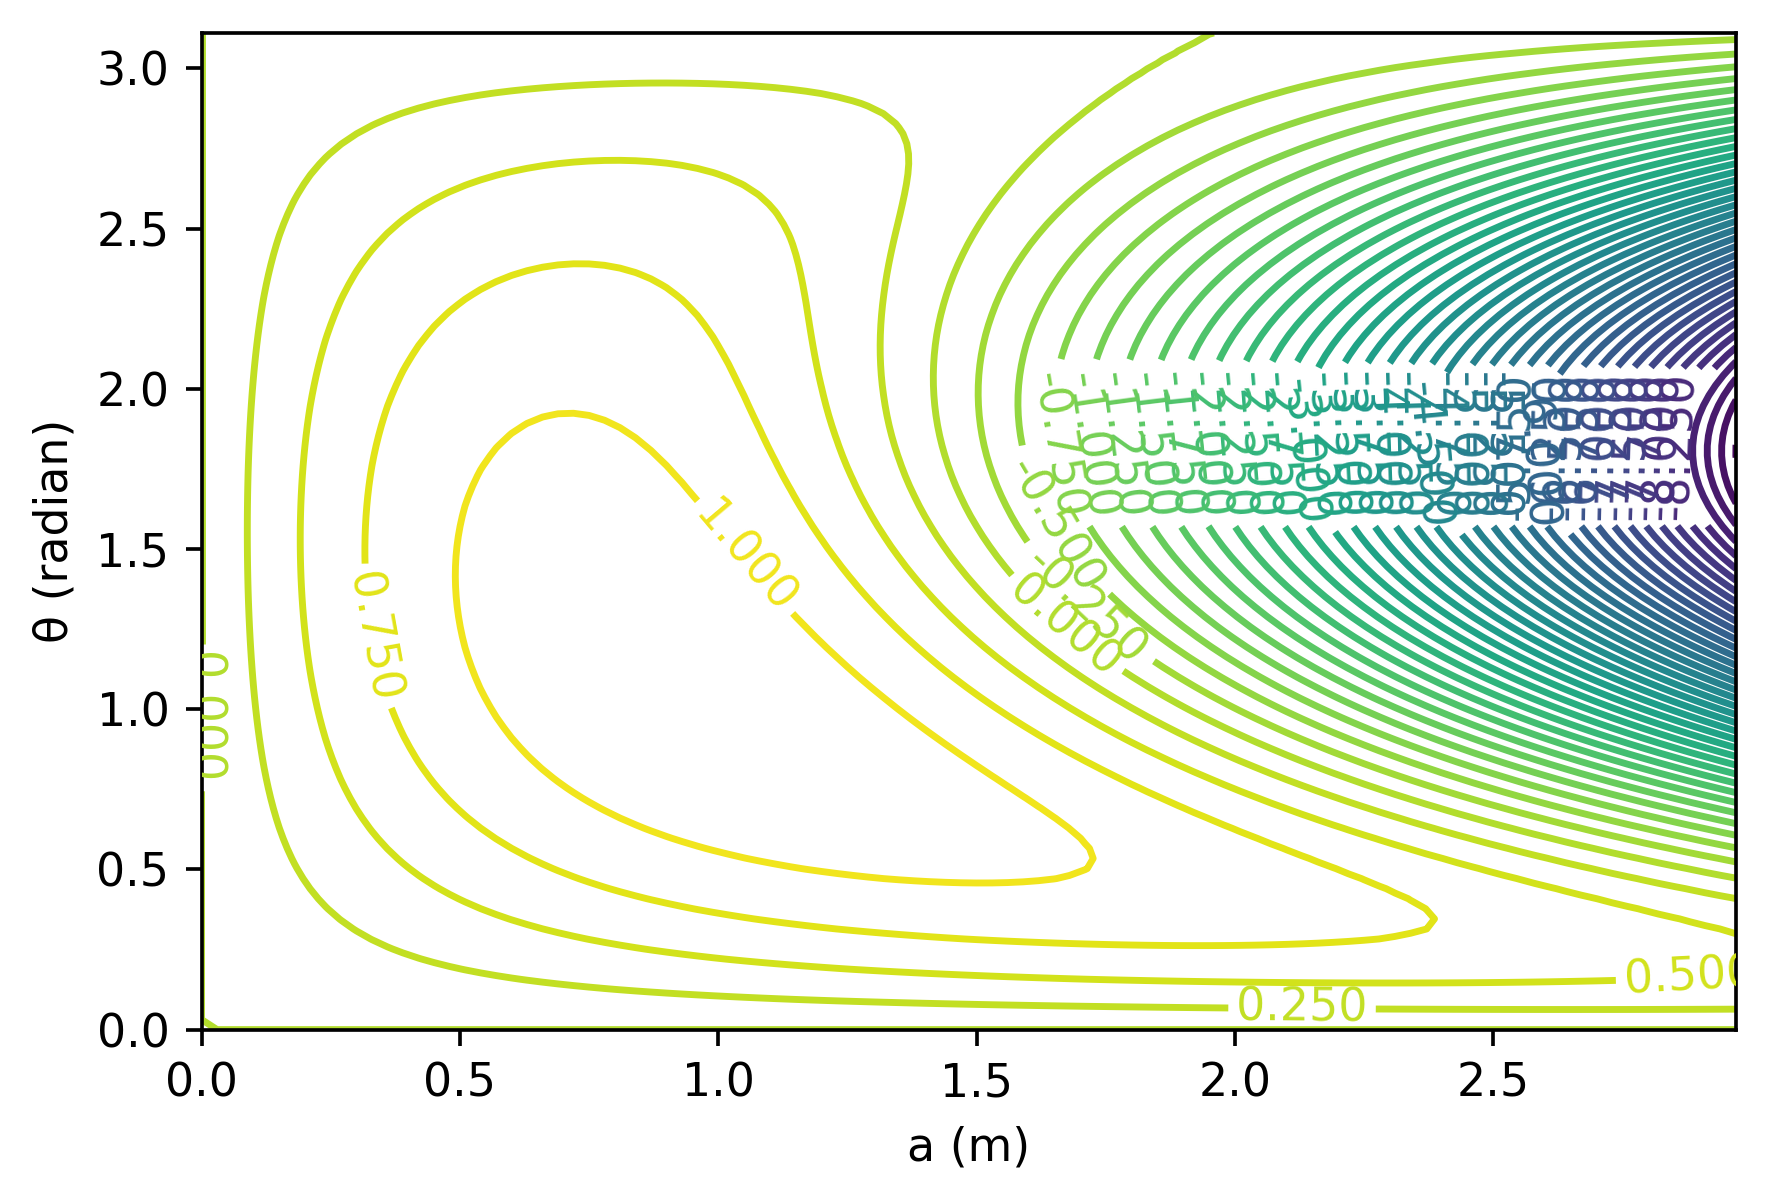

In [150]:
# Fig 1B
a = np.arange(0, 3, 3 / 100)
theta = np.arange(0, np.pi, np.pi / 100)
a_grid, theta_grid = np.meshgrid(a, theta)
area = -a_grid**2 * np.sin(theta_grid)**2 - a_grid**2 * np.sin(theta_grid) + 3*a*np.sin(theta_grid) + a**2*np.cos(theta_grid)*np.sin(theta_grid)/2

fig, ax = plt.subplots(dpi=330)
cs = ax.contour(a_grid, theta_grid, area, 50)
ax.clabel(cs, inline=True, fontsize=10)
plt.xlabel("a (m)")
plt.ylabel("θ (radian)")
plt.show()

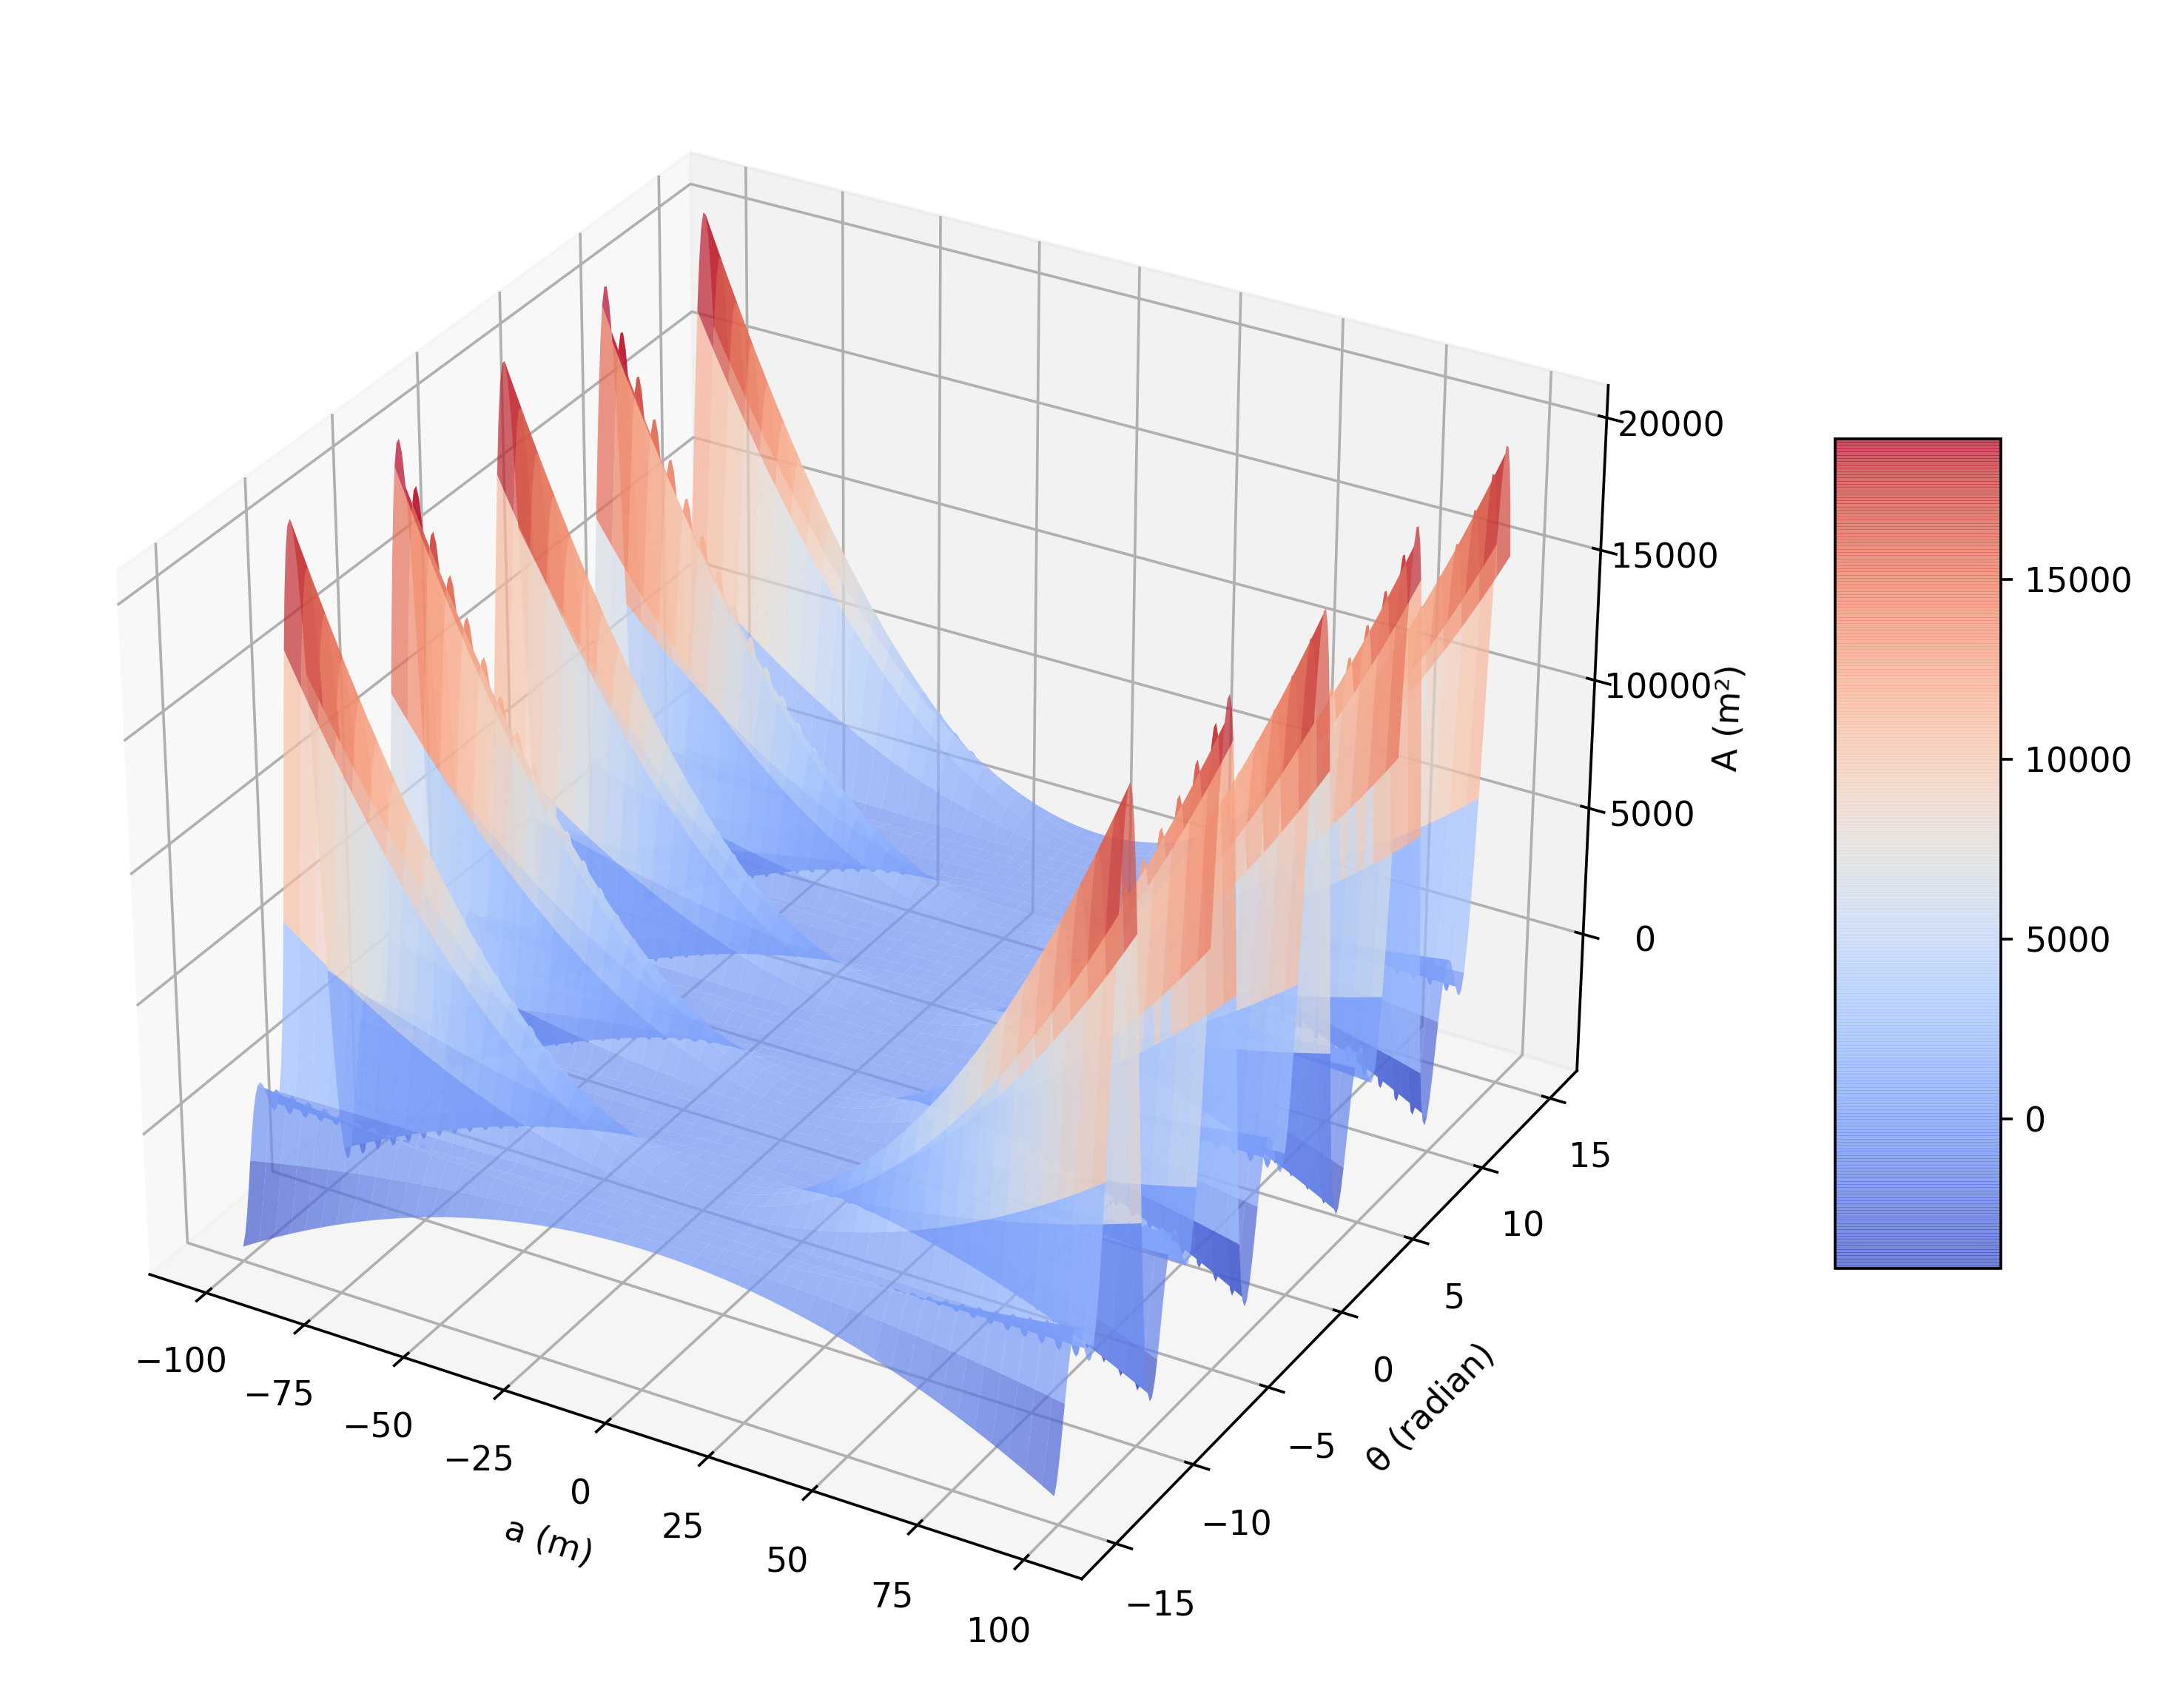

In [152]:
a = np.arange(-100, 100, 100 / 100)
theta = np.arange(-15, 15, 15 / 100)
a_grid, theta_grid = np.meshgrid(a, theta)
area = a_grid**2 * np.sin(theta_grid)**2 + a_grid**2 * np.sin(theta_grid) - 3*a*np.sin(theta_grid) - a**2*np.cos(theta_grid)*np.sin(theta_grid)/2

fig = plt.figure(figsize=(16, 9), dpi=330)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(a_grid, theta_grid, area, cmap=cm.coolwarm, alpha=0.7)
plt.xlabel("a (m)")
plt.ylabel("θ (radian)")
ax.set_zlabel("A (m²)")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Gradient Ascent

In [240]:
def trapez_area(a, theta):
    val = -a**2*np.sin(theta)**2 - a**2*np.sin(theta) +\
    3*a*np.sin(theta) + a**2*np.cos(theta)*np.sin(theta)/2
    
    return val

# checking trap area at maximum
trapez_area(4*np.sqrt(3) - 6, np.pi / 3)

1.205771365940052

In [245]:
def grad_area(a, theta):
    partial_a = np.sin(theta) * (-2*a*np.sin(theta) + a*np.cos(theta) - 2*a + 3)
    partial_theta = a**2/2 * (np.cos(2*theta) - 2*np.sin(2*theta)) - a*(a-3)*np.cos(theta)
    
    return np.array([partial_a, partial_theta])

# checking that gradient is 0 at maximum
grad_area(4*np.sqrt(3) - 6, np.pi / 3)

array([1.15377761e-15, 6.66133815e-16])

In [292]:
def armijo_alpha(x, f, asc, a=0.5, b=0.5):
    alpha = 1
    delta = np.linalg.norm(asc)**2  # gradient x direction of ascent (gradient)
    while (f(*(x + alpha*asc)) < f(*x) + alpha*a*delta):
        alpha *= b
        
    return alpha
    
    

def grad_ascent(x_start, f, gradient, armijo=True, alpha=0.1, eps=1e-10, max_iter=10000):
    x_cur = x_start
    history_x = [np.array(x_cur)]
    history_f = [f(*x_start)]

    for i in range(max_iter):
        asc = gradient(*x_cur)
        if armijo:
            alpha = armijo_alpha(history_x[-1], f, asc)
        else:
            alpha = alpha

        x_cur += alpha * asc
        f_cur = f(*x_cur)

        history_x.append(deepcopy(x_cur))
        history_f.append(f_cur)
    
        if history_f[-1] - history_f[-2] < eps:
            break
            
    return np.array(history_x), np.array(history_f)

In [293]:
# gradient ascent with Armijo
x_start = np.array([1.5, 0])
hist_x, hist_f = grad_ascent(x_start, trapez_area, grad_area)

In [295]:
converge_table = pd.DataFrame(
    {
        "a": hist_x[:, 0],
        "θ": hist_x[:, 1],
        "A(a, θ)": hist_f
    }
)

converge_table

,a,θ,"A(a, θ)"
0,1.500000,0.000000,0.000000
1,1.500000,0.421875,0.964327
2,1.507169,0.561801,1.065993
3,1.461277,0.648575,1.093044
4,1.303206,0.660867,1.128912
5,1.275984,0.738139,1.148263
6,1.057056,0.821356,1.183319
7,1.067727,0.882477,1.193048
8,0.985526,0.964465,1.202974
9,0.961577,1.015947,1.205049


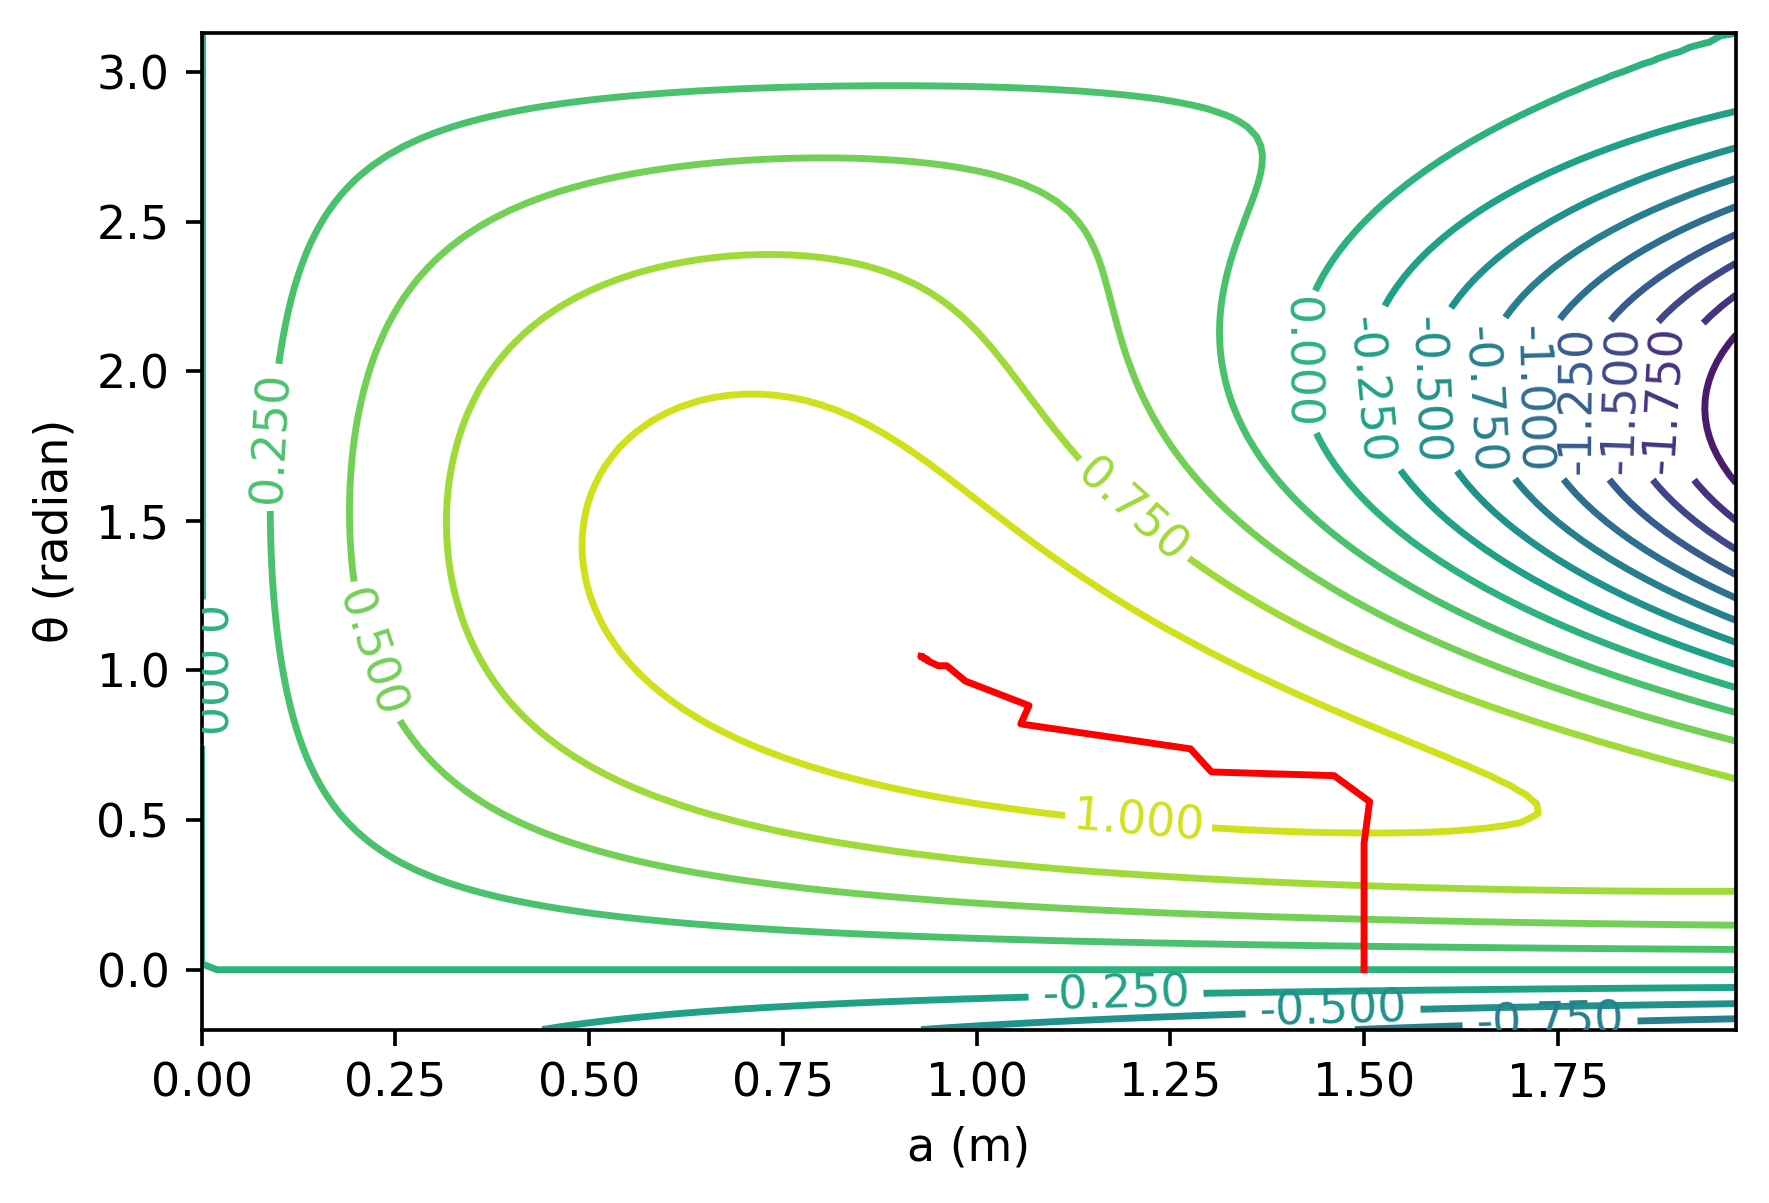

In [311]:
a = np.arange(0, 2, 2 / 100)
theta = np.arange(-0.2, np.pi, np.pi / 100)
a_grid, theta_grid = np.meshgrid(a, theta)
area = -a_grid**2 * np.sin(theta_grid)**2 - a_grid**2 * np.sin(theta_grid) + 3*a*np.sin(theta_grid) + a**2*np.cos(theta_grid)*np.sin(theta_grid)/2

fig, ax = plt.subplots(dpi=330)
cs = ax.contour(a_grid, theta_grid, area, 15)
ax.clabel(cs, inline=True, fontsize=10)
ax.plot(hist_x[:, 0], hist_x[:, 1], c="red")
plt.xlabel("a (m)")
plt.ylabel("θ (radian)")
plt.show()

In [312]:
# standard gradient ascent 
x_start = np.array([1.5, 0])
hist_x, hist_f = grad_ascent(x_start, trapez_area, grad_area, armijo=False)
hist_x

array([[1.5       , 0.        ],
       [1.5       , 0.3375    ],
       [1.51397334, 0.49703436],
       [1.50725248, 0.56514806],
       [1.48818687, 0.59809833],
       [1.46440063, 0.61843452],
       [1.43926052, 0.63420007],
       [1.41409265, 0.64824789],
       [1.38942278, 0.66160943],
       [1.36546949, 0.67466139],
       [1.34232977, 0.68753668],
       [1.32004953, 0.70027419],
       [1.29865101, 0.71287548],
       [1.2781439 , 0.72532713],
       [1.25853   , 0.73760997],
       [1.23980531, 0.74970304],
       [1.22196107, 0.76158549],
       [1.20498443, 0.77323744],
       [1.18885886, 0.78464053],
       [1.17356464, 0.79577815],
       [1.15907925, 0.80663567],
       [1.14537777, 0.81720047],
       [1.13243331, 0.82746203],
       [1.12021743, 0.83741186],
       [1.10870053, 0.84704354],
       [1.09785224, 0.85635254],
       [1.08764172, 0.8653362 ],
       [1.07803806, 0.87399359],
       [1.06901051, 0.88232536],
       [1.06052872, 0.89033361],
       [1.

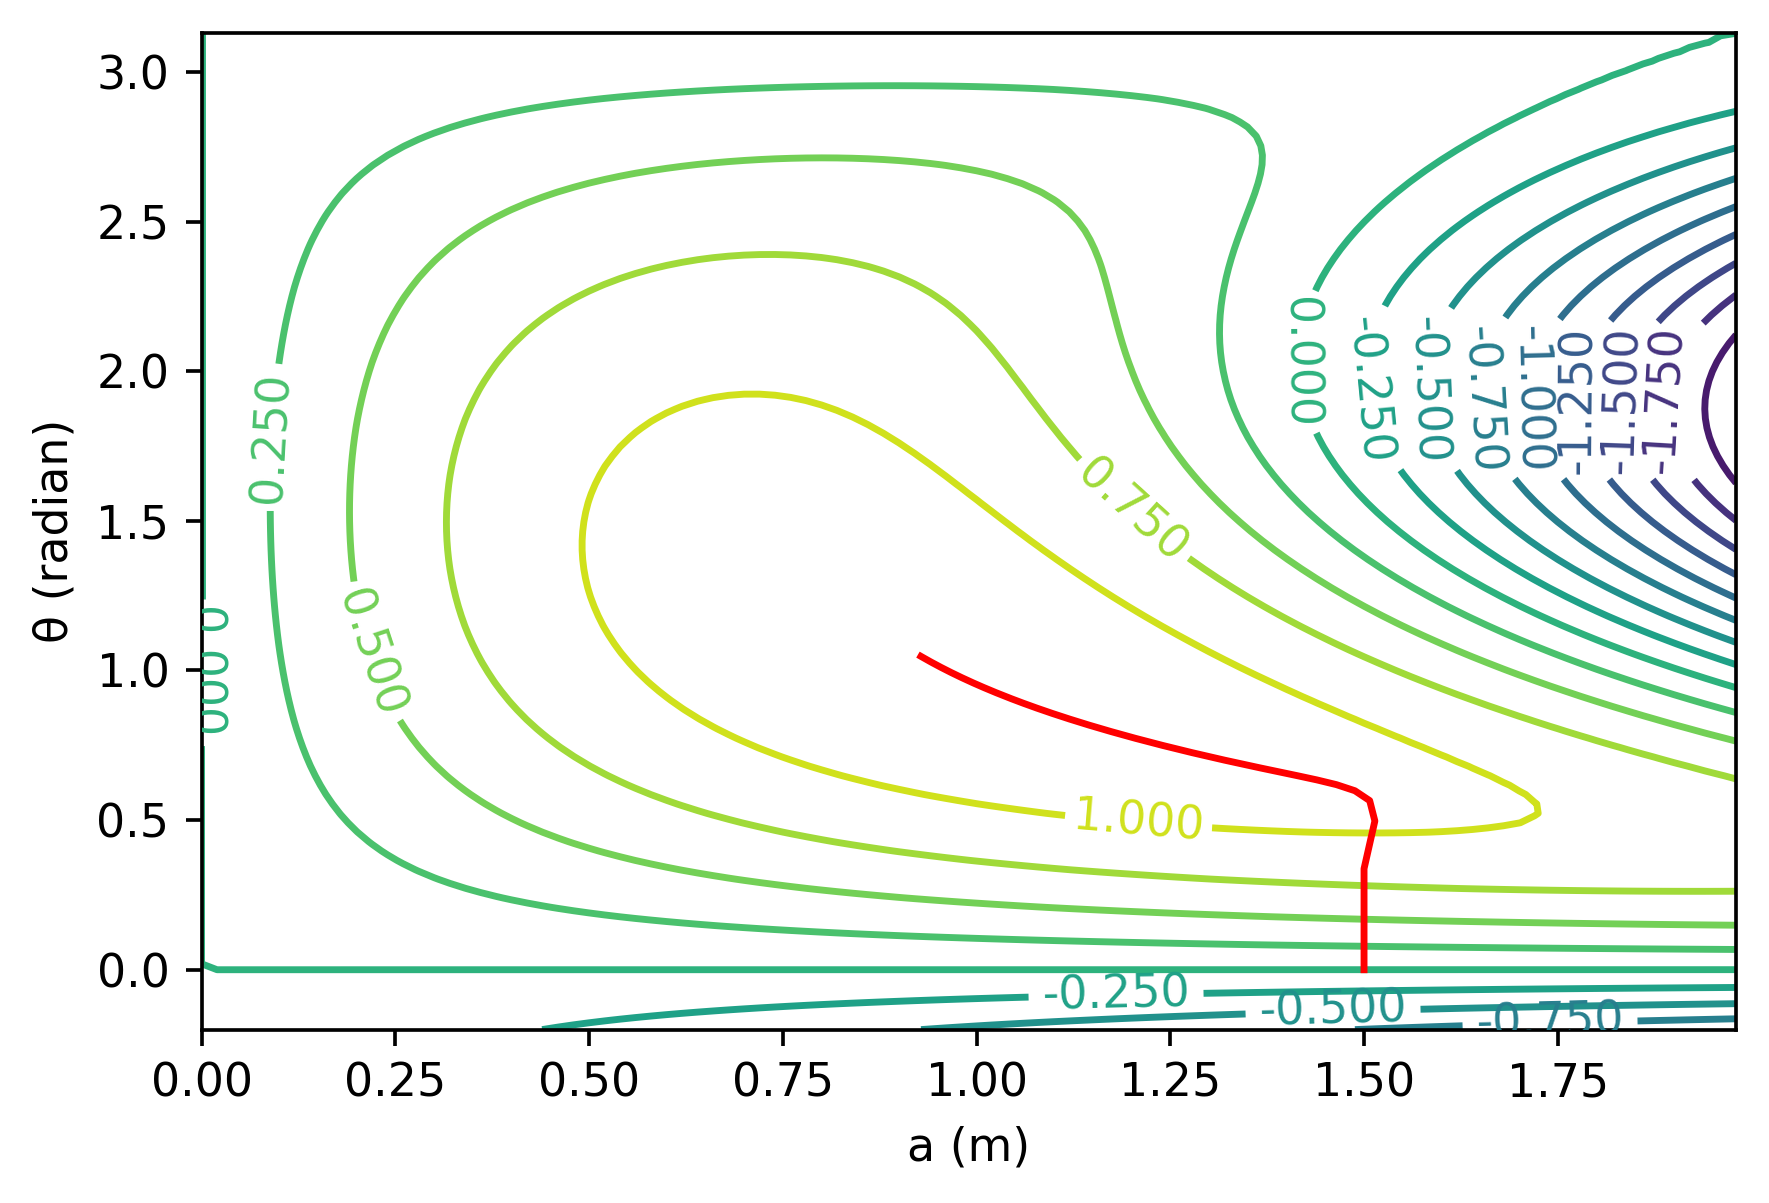

In [313]:
a = np.arange(0, 2, 2 / 100)
theta = np.arange(-0.2, np.pi, np.pi / 100)
a_grid, theta_grid = np.meshgrid(a, theta)
area = -a_grid**2 * np.sin(theta_grid)**2 - a_grid**2 * np.sin(theta_grid) + 3*a*np.sin(theta_grid) + a**2*np.cos(theta_grid)*np.sin(theta_grid)/2

fig, ax = plt.subplots(dpi=330)
cs = ax.contour(a_grid, theta_grid, area, 15)
ax.clabel(cs, inline=True, fontsize=10)
ax.plot(hist_x[:, 0], hist_x[:, 1], c="red")
plt.xlabel("a (m)")
plt.ylabel("θ (radian)")
plt.show()